In [3]:
import sys
sys.path.insert(0,'../sib/')

from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=5000
## new try with 100 spreaders
#N_patient_zero = 200;
N_patient_zero = 5;

lamb = 0.05;
mu = 0.02;

###
scale=1.0; # Easy Case
T=100;
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [15]#, 100, 150, 200]
#seeds=[2]
#n_rankings = [150]
seeds=[7]
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

scenario_rnds = {}
scenario_tracs = {}
scenario_tracs2nd = {}
scenario_MFs = {}
scenario_BPs_5 = {}
scenario_BPs_21 = {}
scenario_BPs_40 = {}



for seed in seeds:
    #no_int = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed), sep="\t")
    scenario_rnds[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_rnd.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking), sep="\t")
    scenario_tracs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")
    scenario_tracs2nd[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac2nd_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")

    scenario_MFs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d.csv"%(N/1000,T,t1,
                                                                                                                    N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep="\t")
    scenario_BPs_5[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_no_tau_win5.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking),sep="\t")
    #scenario_BPs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
                      #, sep="\t")
    scenario_BPs_21[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_no_tau_win21.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking),sep="\t")
    scenario_BPs_40[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_no_tau_win40.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking),sep="\t")

    
scenario_rnd = scenario_rnds[seeds[0]].copy()
scenario_trac = scenario_tracs[seeds[0]].copy()
scenario_trac2nd = scenario_tracs2nd[seeds[0]].copy()
scenario_MF = scenario_MFs[seeds[0]].copy()
scenario_BP_5 = scenario_BPs_5[seeds[0]].copy()
scenario_BP_21 = scenario_BPs_21[seeds[0]].copy()
scenario_BP_40 = scenario_BPs_40[seeds[0]].copy()
for seed in seeds[1:]:
    scenario_rnd += scenario_rnds[seed]
    scenario_trac += scenario_tracs[seed]
    scenario_trac2nd += scenario_tracs2nd[seed]
    scenario_MF += scenario_MFs[seed]
    scenario_BP_5 += scenario_BPs_5[seed]
    scenario_BP_21 += scenario_BPs_21[seed]
    scenario_BP_40 += scenario_BPs_40[seed]

scenario_rnd/=len(seeds)
scenario_trac/=len(seeds)
scenario_trac2nd/=len(seeds)
scenario_MF/=len(seeds)
scenario_BP_5/=len(seeds)
scenario_BP_21/=len(seeds)
scenario_BP_40/=len(seeds)


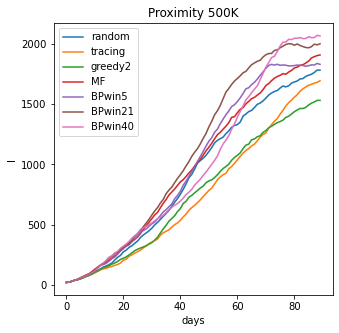

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
alpha = 0.2
alpha1 = 1
ax = scenario_rnd[["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                      color=colors[0], alpha = alpha1)
ax = scenario_trac[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                       color=colors[1], alpha = alpha1)
ax = scenario_trac2nd[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                       color=colors[2], alpha = alpha1)
ax = scenario_MF[["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=colors[3], alpha = alpha1)
ax = scenario_BP_5[["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_5", 
                                                     color=colors[4], alpha = alpha1)
ax = scenario_BP_21[["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_21", 
                                                     color=colors[5], alpha = alpha1)
ax = scenario_BP_40[["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_40", 
                                                     color=colors[6], alpha = alpha1)

for seed in seeds:
    ax = scenario_rnds[seed][["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                          color=colors[0], alpha = alpha)
    ax = scenario_tracs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                           color=colors[1], alpha = alpha)
    ax = scenario_tracs2nd[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                           color=colors[2], alpha = alpha)
    ax = scenario_MFs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=colors[3], alpha = alpha)
    ax = scenario_BPs_5[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_5", 
                                                         color=colors[4], alpha = alpha)
    ax = scenario_BPs_21[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_21", 
                                                         color=colors[5], alpha = alpha)
    ax = scenario_BPs_40[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP_40", 
                                                         color=colors[6], alpha = alpha)
ax.legend(["random", "tracing", "greedy2", "MF", "BPwin5", "BPwin21", "BPwin40"]);
ax.set_ylabel("I")
ax.set_xlabel("days")
ax.set_title("Proximity 500K")
#ax.set_yscale('log')
fig.savefig("50k_proximity_%dseeds_l%.2f_m%.2f_winBP.png"%(len(seeds),lamb,mu))